Todo:
- ženy

In [664]:
import os
import pandas as pd

In [665]:
lvi = pd.read_json(os.path.join('data','ceske_lvy.json'))

In [666]:
lvi.loc[lvi['Film'] == 'Záhrada', 'Film'] = 'Zahrada (8967)'

In [667]:
lvi

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS
0,1994,1995-03-03,Nejlepší zvuk,Michal Dvořák (8266),nominace,Michal Dvořák,1965-11-23T00:00:00.000,None,Amerika (400609),Nejlepší zvuk
1,1994,1995-03-03,Nejlepší hudba,Michal Dvořák (8266),nominace,Michal Dvořák,1965-11-23T00:00:00.000,None,Amerika (400609),Nejlepší hudba
2,1994,1995-03-03,Nejlepší zvuk,Radim Hladík ml. (580),nominace,Radim Hladík jr.,1971-05-15T00:00:00.000,None,Amerika (400609),Nejlepší zvuk
3,1994,1995-03-03,Vedlejší mužský herecký výkon,Jiří Lábus (838),vyhra,Jiří Lábus,1950-01-26T00:00:00.000,None,Amerika (400609),Nejlepší herec ve vedlejší roli
4,1994,1995-03-03,Vedlejší mužský herecký výkon,Jiří Schmitzer (2936),nominace,Jiří Schmitzer,1949-10-25T00:00:00.000,None,Amerika (400609),Nejlepší herec ve vedlejší roli
...,...,...,...,...,...,...,...,...,...,...
2524,2023,2024-03-09,Nejlepší krátký film,Kryštof Burda,nominace,Kryštof Burda,None,None,Osmý den,Nejlepší krátký film
2525,2023,2024-03-09,Nejlepší krátký film,Tomáš Pertold,nominace,Tomáš Pertold,None,None,Osmý den,Nejlepší krátký film
2526,2023,2024-03-09,Nejlepší krátký film,Petr Pylypčuk,nominace,Petr Pylypčuk,None,None,Osmý den,Nejlepší krátký film
2527,2023,2024-03-09,Cena Magnesia za nejlepší studentský film,Petr Pylypčuk,nominace,Petr Pylypčuk,None,None,Osmý den,Cena Magnesia za nejlepší studentský film


In [668]:
lvi['Vyhlášení'] = pd.to_datetime(lvi['Vyhlášení'])
lvi['Datum narození'] = pd.to_datetime(lvi['Datum narození'], format='mixed', errors="coerce")

In [669]:
lvi['Věk'] = lvi['Vyhlášení'] - lvi['Datum narození']

In [670]:
len(lvi[lvi['Věk'].isnull()]) / len(lvi)

0.24476077500988533

In [671]:
bezveku = pd.Series(lvi[lvi['Věk'].isnull()].groupby('Jméno').size())
bezveku.nlargest(60)

Jméno
Jana Bílková (17734)                  9
Eric Abraham (1767)                   8
Pavel Hrdlička (5445)                 8
Michal Reitler (8046)                 6
Tereza Polachová (10612)              6
Henrich Boráros (8151)                5
Jiří Konečný (6776)                   5
Petr Turyna (13496)                   5
Ľubica Orechovská (62007)             5
František Lipták (6532)               4
Jan Novotný (22567)                   4
Jaroslava Brabcová Pecharová          4
Marius Corradini (26549)              4
Zuzana Bambušek Krejzková (140646)    4
Adam Martinec (422103)                3
Andrea McDonald (130268)              3
Bára Anna Stejskalová                 3
David Titěra (19106)                  3
Dušan Husár                           3
Hanka Kastelicová                     3
Jakub Viktorín (80877)                3
Jan Jirásek (7006)                    3
Jonatan Pjoni Pastirčák               3
Ján Kocman                            3
Kateřina Ondřejková (4248)        

In [672]:
lvovstvonestatutarni = lvi[lvi['Lev'] == 'vyhra']['Jméno'].drop_duplicates().to_list()

In [673]:
lvi['KategorieS'].drop_duplicates().to_list()

['Nejlepší zvuk',
 'Nejlepší hudba',
 'Nejlepší herec ve vedlejší roli',
 'Nejlepší výtvarný počin',
 'Nejlepší film',
 'Cena filmových kritiků',
 'Nejlepší režie',
 'Nejlepší herec v hlavní roli',
 'Nejlepší herečka ve vedlejší roli',
 'Nejlepší scénář',
 'Nejlepší střih',
 'Nejlepší kamera',
 'Hlavní ženský herecký výkon',
 'Nejlepší kostýmy',
 'Nejlepší filmový plakát',
 'Cena filmových kritiků a teoretiků za nejlepší hraný film',
 'Nejlepší dokument',
 'Nejlepší masky',
 'Nejlepší scénografie',
 'Cena filmových fanoušků',
 'Mimořádný počin v oblasti audiovize',
 'Nejlepší televizní seriál',
 'Dlouhodobý přínos českému filmu',
 'Nejlepší televizní film nebo minisérie',
 'Nejlepší animovaný film',
 'Cena Magnesia za nejlepší studentský film',
 'Nejlepší krátký film',
 'Cena ČFTA za audiovizuální počin roku',
 'Cena filmových kritiků a teoretiků za nejlepší dokument']

In [674]:
nejsoulvi = ['Cena filmových kritiků','Cena filmových kritiků a teoretiků za nejlepší hraný film','Cena filmových fanoušků','Nejlepší filmový plakát','Cena Magnesia za nejlepší studentský film']

In [675]:
lvi = lvi[~lvi['KategorieS'].isin(nejsoulvi)]

## Basic statistiky a rekordy

In [676]:
lvi.groupby('Ročník')['Kategorie'].nunique()

Ročník
1993    10
1994    13
1995    14
1996    13
1997    13
1998    13
1999    13
2000    13
2001    14
2002    14
2003    13
2004    13
2005    13
2006    13
2007    13
2008    14
2009    15
2010    15
2011    15
2012    15
2013    16
2014    16
2015    16
2016    16
2017    16
2018    17
2019    17
2020    20
2021    20
2022    21
2023    19
Name: Kategorie, dtype: int64

In [677]:
lvi.groupby('Film')['Kategorie'].nunique().nlargest(15)

Film
Bratři                          14
Fair Play (400561)              14
Havel (402069)                  14
Hořící keř (398412)             14
Krajina ve stínu (402170)       14
Ztraceni v Mnichově (400606)    14
Bába z ledu (401257)            13
Díra u Hanušovic (400560)       13
Masaryk (401331)                13
Okupace (402157)                13
Po strništi bos (401274)        13
Toman (401772)                  13
Zátopek                         13
Šarlatán (402092)               13
Anthropoid (400929)             12
Name: Kategorie, dtype: int64

In [678]:
lvi[lvi["Lev"] == 'vyhra'].groupby('Film')['Kategorie'].nunique().nlargest(15)

Film
Masaryk (401331)                  12
Hořící keř (398412)               11
Je třeba zabít Sekala (163291)    10
Nabarvené ptáče (401962)           9
Ve stínu (66076)                   9
Zátopek                            8
Cesta ven (400548)                 7
Štěstí (17155)                     7
                                   6
Bába z ledu (401257)               6
Il Boemo                           6
Kobry a Užovky (400584)            6
Kolja (9013)                       6
Krajina ve stínu (402170)          6
Protektor (52494)                  6
Name: Kategorie, dtype: int64

In [679]:
lvi.groupby('Jméno').size().nlargest(10)

Jméno
Martin Štrba (829)          21
Pavel Rejholec (5364)       18
Alois Fišárek (570)         17
Jan Svěrák (476)            17
Karel Roden nejml. (494)    16
Radim Hladík ml. (580)      16
Jan Hřebejk (4831)          14
Milan Býček (4811)          14
Pavel Strnad (2506)         14
Petr Zelenka (4806)         14
dtype: int64

In [680]:
lvi[lvi["Lev"] == 'vyhra'].groupby('Jméno').size().nlargest(15)

Jméno
Jiří Brožek (154)          9
Pavel Rejholec (5364)      8
Vladimír Smutný (1772)     8
Ivan Trojan (6789)         7
Jakub Čech (6357)          7
Alois Fišárek (570)        6
Anna Geislerová (5433)     5
Bohdan Sláma (926)         5
David Ondříček (2028)      5
Jan Svěrák (476)           5
Jan Vlasák (1805)          5
Jan Švankmajer (406)       5
Klára Melíšková (13764)    5
Martin Štrba (829)         5
Petr Zelenka (4806)        5
dtype: int64

In [681]:
lvi.groupby('Jméno')['KategorieS'].nunique().nlargest()

Jméno
Jan Švankmajer (406)       6
David Ondříček (2028)      4
Jan Prušinovský (15043)    4
Jiří Bartoška (827)        4
Martin Šulík (5432)        4
Name: KategorieS, dtype: int64

In [682]:
lvi[lvi['Jméno'] == 'Jan Švankmajer (406)']

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
794,1994,1995-03-03,Dlouholetý umělecký přínos českému filmu,Jan Švankmajer (406),vyhra,Jan Švankmajer,1934-09-04,None,,Dlouhodobý přínos českému filmu,22095 days
1488,1994,1995-03-03,Nejlepší režie,Jan Švankmajer (406),nominace,Jan Švankmajer,1934-09-04,None,Lekce Faust (7783),Nejlepší režie,22095 days
1489,1994,1995-03-03,Nejlepší scénář,Jan Švankmajer (406),nominace,Jan Švankmajer,1934-09-04,None,Lekce Faust (7783),Nejlepší scénář,22095 days
1490,1994,1995-03-03,Nejlepší výtvarný počin,Jan Švankmajer (406),vyhra,Jan Švankmajer,1934-09-04,None,Lekce Faust (7783),Nejlepší výtvarný počin,22095 days
1495,2001,2002-03-02,Nejlepší režie,Jan Švankmajer (406),nominace,Jan Švankmajer,1934-09-04,None,Otesánek (401949),Nejlepší režie,24651 days
1496,2001,2002-03-02,Nejlepší scénář,Jan Švankmajer (406),nominace,Jan Švankmajer,1934-09-04,None,Otesánek (401949),Nejlepší scénář,24651 days
1498,2001,2002-03-02,Nejlepší výtvarné řešení,Jan Švankmajer (406),vyhra,Jan Švankmajer,1934-09-04,None,Otesánek (401949),Nejlepší výtvarný počin,24651 days
1507,2020,2021-03-06,Nejlepší dokumentární film,Jan Švankmajer (406),nominace,Jan Švankmajer,1934-09-04,None,Alchymická pec (402082),Nejlepší dokument,31595 days
1513,1996,1997-03-01,Nejlepší výtvarný počin,Jan Švankmajer (406),nominace,Jan Švankmajer,1934-09-04,None,Spiklenci slasti (9103),Nejlepší výtvarný počin,22824 days
1517,2010,2011-03-05,Nejlepší režie,Jan Švankmajer (406),nominace,Jan Švankmajer,1934-09-04,None,Přežít svůj život (163876),Nejlepší režie,27941 days


In [683]:
lvi[lvi['Lev'] == 'vyhra'].groupby('Jméno')['KategorieS'].nunique().nlargest(10)

Jméno
David Ondříček (2028)      3
Jan Budař (11090)          3
Jan Švankmajer (406)       3
Julius Ševčík (149)        3
Pavla Kubečková (35194)    3
Václav Marhoul (3781)      3
Alois Fišárek (570)        2
Anna Geislerová (5433)     2
Bohdan Sláma (926)         2
David Vondráček (616)      2
Name: KategorieS, dtype: int64

In [684]:
lvi[(lvi['Lev'] == 'vyhra') & (lvi['Jméno'] == "David Ondříček (2028)")].sort_values(by="Ročník")

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
735,2012,2013-03-02,Nejlepší film,David Ondříček (2028),vyhra,David Ondříček,1969-06-23,None,Ve stínu (66076),Nejlepší film,15958 days
736,2012,2013-03-02,Nejlepší režie,David Ondříček (2028),vyhra,David Ondříček,1969-06-23,None,Ve stínu (66076),Nejlepší režie,15958 days
737,2012,2013-03-02,Nejlepší scénář,David Ondříček (2028),vyhra,David Ondříček,1969-06-23,None,Ve stínu (66076),Nejlepší scénář,15958 days
760,2021,2022-03-05,Nejlepší celovečerní hraný film,David Ondříček (2028),vyhra,David Ondříček,1969-06-23,None,Zátopek,Nejlepší film,19248 days
761,2021,2022-03-05,Nejlepší režie,David Ondříček (2028),vyhra,David Ondříček,1969-06-23,None,Zátopek,Nejlepší režie,19248 days


In [685]:
lvi[(lvi['Lev'] == 'vyhra') & (lvi['Jméno'] == "Jan Budař (11090)")].sort_values(by="Ročník")

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
1434,2003,2004-03-03,Hlavní mužský herecký výkon,Jan Budař (11090),vyhra,Jan Budař,1977-07-31,None,Nuda v Brně (20268),Nejlepší herec v hlavní roli,9712 days
1435,2003,2004-03-03,Nejlepší scénář,Jan Budař (11090),vyhra,Jan Budař,1977-07-31,None,Nuda v Brně (20268),Nejlepší scénář,9712 days
829,2004,2005-03-05,Vedlejší mužský herecký výkon,Jan Budař (11090),vyhra,Jan Budař,1977-07-31,None,Mistři (27735),Nejlepší herec ve vedlejší roli,10079 days
682,2007,2008-03-01,Vedlejší mužský herecký výkon,Jan Budař (11090),vyhra,Jan Budař,1977-07-31,None,Václav (54224),Nejlepší herec ve vedlejší roli,11171 days


In [686]:
lvi[(lvi['Lev'] == 'vyhra') & (lvi['Jméno'] == "Pavla Janoušková Kubečková (107301)")].sort_values(by="Ročník")

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk


In [687]:
lvi[(lvi['Lev'] == 'vyhra') & (lvi['Jméno'] == "Julius Ševčík (149)")].sort_values(by="Ročník")

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
383,2016,2017-03-04,Nejlepší film,Julius Ševčík (149),vyhra,Julius Ševčík,1978-10-28,None,Masaryk (401331),Nejlepší film,14007 days
384,2016,2017-03-04,Nejlepší režie,Julius Ševčík (149),vyhra,Julius Ševčík,1978-10-28,None,Masaryk (401331),Nejlepší režie,14007 days
385,2016,2017-03-04,Nejlepší scénář,Julius Ševčík (149),vyhra,Julius Ševčík,1978-10-28,None,Masaryk (401331),Nejlepší scénář,14007 days


In [688]:
lvi[(lvi['Lev'] == 'vyhra') & (lvi['Jméno'] == "Jiří Brožek (154)")].sort_values(by="Ročník")

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
1414,1993,1994-02-25,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,Krvavý román (398471),Nejlepší střih,17153 days
27,1998,1999-02-28,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,Je třeba zabít Sekala (163291),Nejlepší střih,18982 days
48,2000,2001-03-03,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,Anděl Exit (260),Nejlepší střih,19716 days
1426,2003,2004-03-03,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,Nuda v Brně (20268),Nejlepší střih,20812 days
1436,2005,2006-02-25,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,Sluneční stát (36261),Nejlepší střih,21536 days
1440,2006,2007-03-03,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,Hezké chvilky bez záruky (38735),Nejlepší střih,21907 days
1454,2007,2008-03-01,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,...a bude hůř (45816),Nejlepší střih,22271 days
690,2011,2012-03-03,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,Odcházení (56870),Nejlepší střih,23734 days
1260,2017,2018-03-10,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,Špína (401181),Nejlepší střih,25932 days


In [689]:
lvi[lvi["Lev"] == 'vyhra'].groupby('Jméno')['Ročník'].nunique().nlargest(15)

Jméno
Jiří Brožek (154)          9
Pavel Rejholec (5364)      8
Vladimír Smutný (1772)     8
Jakub Čech (6357)          7
Alois Fišárek (570)        6
Ivan Trojan (6789)         6
Anna Geislerová (5433)     5
Jan Vlasák (1805)          5
Klára Melíšková (13764)    5
Martin Štrba (829)         5
Radim Hladík ml. (580)     5
Ivo Špalj (694)            4
Jan P. Muchow (2302)       4
Jan Švankmajer (406)       4
Jiří Schmitzer (2936)      4
Name: Ročník, dtype: int64

In [690]:
lvovstvo = lvi[lvi["Lev"] == 'vyhra']['Jméno'].drop_duplicates().to_list()

In [691]:
lvi[~lvi['Jméno'].isin(lvovstvo)].groupby('Jméno').size().nlargest(10)

Jméno
Jana Bílková (17734)         9
Petr Ostrouchov (5833)       8
Jakub Hejna (2291)           7
Jan Čeněk (931)              6
Radim Procházka (7830)       6
Slávek Horák (80123)         6
Andrea Sedláčková (4786)     5
Ivan Fíla (11360)            5
Petr Turyna (13496)          5
Zuzana Mistríková (62009)    5
dtype: int64

In [692]:
nominantstvo = lvi[lvi["Lev"] == 'nominace']['Jméno'].drop_duplicates().to_list()

In [693]:
lvi[~lvi['Jméno'].isin(nominantstvo)].groupby('Jméno').size().nlargest(10)

Jméno
Jan Budař (11090)            4
Jan Balej (211)              3
Julius Ševčík (149)          3
Martin Velíšek (1289)        3
Adéla Komrzý (100948)        2
Agnieszka Holland (12106)    2
David Vondráček (616)        2
Jiří Kodet (7135)            2
Luboš Fišer (1492)           2
Lukáš Přibyl (35920)         2
dtype: int64

In [694]:
(lvi[lvi['Lev'] == 'vyhra']['Věk'].max() - lvi[lvi['Lev'] == 'vyhra']['Věk'].min()).days / 365.25

83.84394250513347

In [695]:
2616 / 365.25

7.162217659137577

In [696]:
lvi.sort_values(by="Věk").head(10)

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
431,1996,1997-03-01,Vedlejší mužský herecký výkon,Andrej Chalimon (37311),vyhra,Andrej Chalimon,1990-01-01,None,Kolja (9013),Nejlepší herec ve vedlejší roli,2616 days
563,2019,2020-03-07,Nejlepší mužský herecký výkon v hlavní roli,Petr Kotlár (120298),nominace,Petr Kotlár,2007-01-01,None,Nabarvené ptáče (401962),Nejlepší herec v hlavní roli,4814 days
125,1995,1996-03-02,Hlavní ženský herecký výkon,Klára Issová (1058),nominace,Klára Issová,1979-04-26,None,Indiánské léto (8296),Hlavní ženský herecký výkon,6155 days
1736,1995,1996-03-02,Hlavní ženský herecký výkon,Zuzana Šulajová (8446),nominace,Zuzana Šulajová,1978-07-14,None,Zahrada (8967),Hlavní ženský herecký výkon,6441 days
121,1995,1996-03-02,Vedlejší ženský herecký výkon,Tatiana Vilhelmová (935),nominace,Tatiana Dyková Vilhelmová,1978-07-13,None,Indiánské léto (8296),Nejlepší herečka ve vedlejší roli,6442 days
1378,2011,2012-03-03,Vedlejší ženský herecký výkon,Anna Linhartová (79451),nominace,Anna Linhartová,1994-03-21,None,Nevinnost (163675),Nejlepší herečka ve vedlejší roli,6557 days
1589,1994,1995-03-03,Vedlejší ženský herecký výkon,Andrea Elsnerová (26762),nominace,Andrea Elsnerová,1977-02-05,None,Řád (7787),Nejlepší herečka ve vedlejší roli,6600 days
127,1996,1997-03-01,Hlavní ženský herecký výkon,Tatiana Vilhelmová (935),nominace,Tatiana Dyková Vilhelmová,1978-07-13,None,Šeptej (9148),Hlavní ženský herecký výkon,6806 days
656,1997,1998-02-28,Vedlejší ženský herecký výkon,Klára Issová (1058),vyhra,Klára Issová,1979-04-26,None,Nejasná zpráva o konci světa (9463),Nejlepší herečka ve vedlejší roli,6883 days
1482,1994,1995-03-03,Hlavní ženský herecký výkon,Anna Geislerová (5433),nominace,Anna Geislerová,1976-04-17,None,Jízda (7790),Hlavní ženský herecký výkon,6894 days


In [697]:
lvi.sort_values(by="Věk").dropna().tail(20)

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
1801,1999,2000-03-04,Nejlepší režie,Karel Kachyňa (3526),nominace,Karel Kachyňa,1924-05-01,2004-03-12T00:00:00.000,Hanele (22572),Nejlepší režie,27701 days
315,2010,2011-03-05,Nejlepší scénář,Juraj Herz (7875),nominace,Juraj Herz,1934-09-04,2018-04-08T00:00:00.000,Habermannův mlýn (103372),Nejlepší scénář,27941 days
709,1998,1999-02-28,Vedlejší ženský herecký výkon,Sylva Langová (25592),nominace,Sylva Langová,1921-08-31,2010-01-15T00:00:00.000,Postel (38577),Nejlepší herečka ve vedlejší roli,28305 days
814,2011,2012-03-03,Mimořádný přínos české kinematografii,Josef Somr (1054),vyhra,Josef Somr,1934-04-15,2022-10-16T00:00:00.000,,Dlouhodobý přínos českému filmu,28447 days
1545,2003,2004-03-03,Vedlejší ženský herecký výkon,Jaroslava Adamová (11226),nominace,Jaroslava Adamová,1925-03-15,2012-06-16T00:00:00.000,Želary (13452),Nejlepší herečka ve vedlejší roli,28843 days
259,2001,2002-03-02,Hlavní ženský herecký výkon,Stella Zázvorková (834),vyhra,Stella Zázvorková,1922-04-14,2005-05-17T00:00:00.000,Babí léto (1418),Hlavní ženský herecký výkon,29177 days
807,1998,1999-02-28,Dlouholetý umělecký přínos českému filmu,Jiří Krejčík (7882),vyhra,Jiří Krejčík,1918-06-26,2013-08-08T00:00:00.000,,Dlouhodobý přínos českému filmu,29467 days
1209,2019,2020-03-07,Nejlepší mužský herecký výkon ve vedlejší roli,Ladislav Mrkvička (6298),vyhra,Ladislav Mrkvička,1939-02-02,2020-12-27T00:00:00.000,Staříci (401990),Nejlepší herec ve vedlejší roli,29619 days
262,2001,2002-03-02,Hlavní mužský herecký výkon,Vlastimil Brodský (833),vyhra,Vlastimil Brodský,1920-12-15,2002-04-20T00:00:00.000,Babí léto (1418),Nejlepší herec v hlavní roli,29662 days
1410,2012,2013-03-02,Vedlejší ženský herecký výkon,Jiřina Jirásková (22836),nominace,Jiřina Jirásková,1931-02-17,2013-01-07T00:00:00.000,Vrásky z lásky (160354),Nejlepší herečka ve vedlejší roli,29964 days


In [698]:
33240 / 365

91.06849315068493

In [699]:
lvi[lvi['Datum úmrtí'] < lvi['Vyhlášení']].sort_values(by="Vyhlášení")

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
1491,1994,1995-03-03,Hlavní mužský herecký výkon,Petr Čepek (4764),vyhra,Petr Čepek,1940-09-16,1994-09-20T00:00:00.000,Lekce Faust (7783),Nejlepší herec v hlavní roli,19891 days
1578,1994,1995-03-03,Vedlejší mužský herecký výkon,Josef Kemr (4897),nominace,Josef Kemr,1922-06-20,1995-01-15T00:00:00.000,Pevnost (185691),Nejlepší herec ve vedlejší roli,26554 days
1621,2005,2006-02-25,Nejlepší výtvarný počin,Eva Švankmajerová (7289),vyhra,Eva Švankmajerová,1940-09-25,2005-10-20T00:00:00.000,Šílení (35194),Nejlepší výtvarný počin,23894 days
2137,2008,2009-03-07,Nejlepší dokument,Pavel Koutecký (566),vyhra,Pavel Koutecký,1956-06-10,2006-04-13T00:00:00.000,Občan Havel (45195),Nejlepší dokument,19263 days
1850,2010,2011-03-05,Vedlejší mužský herecký výkon,Vladimír Dlouhý (5496),vyhra,Vladimír Dlouhý,1958-06-10,2010-06-20T00:00:00.000,Kajínek (55120),Nejlepší herec ve vedlejší roli,19261 days
686,2011,2012-03-03,Nejlepší režie,Václav Havel (676),nominace,Václav Havel,1936-10-05,2011-12-18T00:00:00.000,Odcházení (56870),Nejlepší režie,27543 days
687,2011,2012-03-03,Nejlepší scénář,Václav Havel (676),vyhra,Václav Havel,1936-10-05,2011-12-18T00:00:00.000,Odcházení (56870),Nejlepší scénář,27543 days
1410,2012,2013-03-02,Vedlejší ženský herecký výkon,Jiřina Jirásková (22836),nominace,Jiřina Jirásková,1931-02-17,2013-01-07T00:00:00.000,Vrásky z lásky (160354),Nejlepší herečka ve vedlejší roli,29964 days
388,2016,2017-03-04,Nejlepší scénář,Alex Koenigsmark (76145),vyhra,Alex Koenigsmark,1944-05-27,2013-01-23T00:00:00.000,Masaryk (401331),Nejlepší scénář,26579 days
1890,2019,2020-03-07,Nejlepší filmová scénografie,Martin Kurel (6828),nominace,Martin Kurel,1961-01-27,2019-07-04T00:00:00.000,Hodinářův učeň (401938),Nejlepší scénografie,21589 days


In [700]:
lvi[(lvi['Datum úmrtí'] < lvi['Vyhlášení']) & (lvi['Lev'] == 'vyhra')].sort_values(by="Vyhlášení")

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
1491,1994,1995-03-03,Hlavní mužský herecký výkon,Petr Čepek (4764),vyhra,Petr Čepek,1940-09-16,1994-09-20T00:00:00.000,Lekce Faust (7783),Nejlepší herec v hlavní roli,19891 days
1621,2005,2006-02-25,Nejlepší výtvarný počin,Eva Švankmajerová (7289),vyhra,Eva Švankmajerová,1940-09-25,2005-10-20T00:00:00.000,Šílení (35194),Nejlepší výtvarný počin,23894 days
2137,2008,2009-03-07,Nejlepší dokument,Pavel Koutecký (566),vyhra,Pavel Koutecký,1956-06-10,2006-04-13T00:00:00.000,Občan Havel (45195),Nejlepší dokument,19263 days
1850,2010,2011-03-05,Vedlejší mužský herecký výkon,Vladimír Dlouhý (5496),vyhra,Vladimír Dlouhý,1958-06-10,2010-06-20T00:00:00.000,Kajínek (55120),Nejlepší herec ve vedlejší roli,19261 days
687,2011,2012-03-03,Nejlepší scénář,Václav Havel (676),vyhra,Václav Havel,1936-10-05,2011-12-18T00:00:00.000,Odcházení (56870),Nejlepší scénář,27543 days
388,2016,2017-03-04,Nejlepší scénář,Alex Koenigsmark (76145),vyhra,Alex Koenigsmark,1944-05-27,2013-01-23T00:00:00.000,Masaryk (401331),Nejlepší scénář,26579 days
1897,2020,2021-03-06,Nejlepší scénografie,Martin Kurel (6828),vyhra,Martin Kurel,1961-01-27,2019-07-04T00:00:00.000,Marie Terezie II,Nejlepší scénografie,21953 days


In [701]:
lvi[lvi['Jméno'].str.contains("Václav Havel")]

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
686,2011,2012-03-03,Nejlepší režie,Václav Havel (676),nominace,Václav Havel,1936-10-05,2011-12-18T00:00:00.000,Odcházení (56870),Nejlepší režie,27543 days
687,2011,2012-03-03,Nejlepší scénář,Václav Havel (676),vyhra,Václav Havel,1936-10-05,2011-12-18T00:00:00.000,Odcházení (56870),Nejlepší scénář,27543 days


In [702]:
lvi.groupby(["Ročník","Jméno"])['Film'].nunique().nlargest()

Ročník  Jméno                  
2021    Pavel Rejholec (5364)      3
2022    Michal Reitler (8046)      3
        Pavla Kubečková (35194)    3
1994    Alois Fišárek (570)        2
        F. A. Brabec (5610)        2
Name: Film, dtype: int64

In [703]:
lvi[lvi['Jméno'] == 'Pavla Janoušková Kubečková']

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk


In [704]:
lvi[lvi['Jméno'] == 'Michal Reitler (8046)']

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
989,2021,2022-03-05,Nejlepší televizní film nebo minisérie,Michal Reitler (8046),vyhra,Michal Reitler,NaT,None,Božena,Nejlepší televizní film nebo minisérie,NaT
1174,2022,2023-03-04,Nejlepší televizní film nebo minisérie,Michal Reitler (8046),vyhra,Michal Reitler,NaT,None,Podezření (396954),Nejlepší televizní film nebo minisérie,NaT
1936,2022,2023-03-04,Nejlepší televizní film nebo minisérie,Michal Reitler (8046),nominace,Michal Reitler,NaT,None,Král Šumavy: Fantom temného kraje,Nejlepší televizní film nebo minisérie,NaT
2237,2022,2023-03-04,Nejlepší televizní seriál,Michal Reitler (8046),vyhra,Michal Reitler,NaT,None,Devadesátky,Nejlepší televizní seriál,NaT
2260,2023,2024-03-09,Nejlepší televizní seriál,Michal Reitler (8046),nominace,Michal Reitler,NaT,None,"Dobré ráno, Brno!",Nejlepší televizní seriál,NaT
2498,2021,2022-03-05,Nejlepší televizní seriál,Michal Reitler (8046),vyhra,Michal Reitler,NaT,None,Ochránce,Nejlepší televizní seriál,NaT


In [705]:
lvi[lvi['Jméno'] == 'Andrea Sedláčková (4786)']

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
1045,2014,2015-02-21,Nejlepší režie,Andrea Sedláčková (4786),nominace,Andrea Sedláčková,1967-02-22,None,Fair Play (400561),Nejlepší režie,17531 days
1046,2014,2015-02-21,Nejlepší scénář,Andrea Sedláčková (4786),nominace,Andrea Sedláčková,1967-02-22,None,Fair Play (400561),Nejlepší scénář,17531 days
2347,2014,2015-02-21,Nejlepší dokument,Andrea Sedláčková (4786),nominace,Andrea Sedláčková,1967-02-22,None,Život podle Václava Havla (400664),Nejlepší dokument,17531 days
2348,2020,2021-03-06,Nejlepší dokumentární film,Andrea Sedláčková (4786),nominace,Andrea Sedláčková,1967-02-22,None,Můj otec Antonín Kratochvíl (402148),Nejlepší dokument,19736 days
2350,2022,2023-03-04,Nejlepší dokumentární film,Andrea Sedláčková (4786),nominace,Andrea Sedláčková,1967-02-22,None,"Toyen, baronka surrealismu",Nejlepší dokument,20464 days


In [706]:
lvi.groupby(['Jméno','Ročník']).size().nlargest()

Jméno                     Ročník
Jan Švankmajer (406)      1994      4
Sean Ellis (130080)       2016      4
Václav Marhoul (3781)     2019      4
Andrea Sedláčková (4786)  2014      3
David Ondříček (2028)     2012      3
dtype: int64

In [707]:
lvi[lvi['KategorieS'].str.contains('here',na=False)].groupby(['Jméno','Ročník']).size().nlargest(20)

Jméno                     Ročník
Boleslav Polívka (1556)   2000      2
David Novotný (1834)      2008      2
Eliška Balzerová (14418)  2010      2
Eliška Křenková (26750)   2021      2
Ivan Trojan (6789)        2002      2
Karel Roden nejml. (494)  2011      2
                          2016      2
Martin Huba (7134)        2009      2
Martin Pechlát (9426)     2021      2
Oldřich Kaiser (1794)     2011      2
Ondřej Vetchý (836)       2012      2
Adam Mišík (27584)        2022      1
Agnieszka Sitek (75805)   1998      1
Alena Mihulová (7032)     2015      1
                          2021      1
Alois Švehlík (6277)      2019      1
Andrea Elsnerová (26762)  1994      1
Andrej Chalimon (37311)   1996      1
Andrej Hryc (6636)        1998      1
Anna Friel (40427)        2008      1
dtype: int64

In [708]:
lvi[lvi['KategorieS'].str.contains('here',na=False) & (lvi['Lev'] == 'vyhra')].groupby(['Jméno','Ročník']).size().nlargest(20)

Jméno                       Ročník
Ivan Trojan (6789)          2002      2
Agnieszka Sitek (75805)     1998      1
Alena Mihulová (7032)       2015      1
Andrej Chalimon (37311)     1996      1
Anna Geislerová (5433)      1999      1
                            2003      1
                            2005      1
                            2006      1
                            2011      1
Anna Šišková (6600)         2000      1
Antonie Formanová (131569)  2021      1
Boleslav Polívka (1556)     1996      1
                            2000      1
Daniela Kolářová (1847)     2009      1
Eliška Balzerová (14418)    2010      1
Eliška Křenková (26750)     2018      1
Emília Vášáryová (4986)     2004      1
Eva Holubová (5948)         2000      1
Gabriela Míčová (9758)      2012      1
Hynek Čermák (3370)         2011      1
dtype: int64

## Spojení s filmy

In [709]:
filmy = pd.read_json(os.path.join('data','filmy.json'))

In [710]:
typologie = filmy.explode("Typologie")
celoveceraky = typologie[(typologie['Typologie'] == 'hraný') & (typologie['Délka'] == 'dlouhometrážní')]
celoveceraky = celoveceraky['Film'].drop_duplicates().to_list()

In [711]:
hraji = filmy[['Copyright','Film','Hrají']]

In [712]:
hraji = hraji.explode("Hrají")

In [713]:
hraji[hraji['Hrají'].isin(lvovstvo)][['Hrají','Film']].drop_duplicates().groupby('Film').size().nlargest(10)

Film
Odcházení (56870)                13
Velká filmová loupež (397520)    12
Čert ví proč (15823)             12
Anděl Páně 2 (401251)            11
Mazaný Filip (20319)             11
Vrásky z lásky (160354)          10
Hořící keř (398412)               9
Obecná škola (397700)             9
Rok ďábla (12836)                 9
Všichni moji blízcí (53125)       9
dtype: int64

In [714]:
hraji[hraji['Hrají'].isin(lvovstvonestatutarni)][['Hrají','Film']].drop_duplicates().groupby('Film').size().nlargest(10)

Film
Mazaný Filip (20319)             15
Odcházení (56870)                13
Velká filmová loupež (397520)    12
Čert ví proč (15823)             12
Anděl Páně 2 (401251)            11
Vrásky z lásky (160354)          10
Gympl (45351)                     9
Hořící keř (398412)               9
Obecná škola (397700)             9
Rok ďábla (12836)                 9
dtype: int64

In [715]:
hraji[(hraji['Hrají'].isin(lvovstvonestatutarni)) & (hraji['Film'] == 'Mazaný Filip (20319)')]

,Copyright,Film,Hrají
3488,2003,Mazaný Filip (20319),Vilma Cibulková (2416)
3488,2003,Mazaný Filip (20319),Pavel Liška (984)
3488,2003,Mazaný Filip (20319),Eva Holubová (5948)
3488,2003,Mazaný Filip (20319),Matěj Hádek (11532)
3488,2003,Mazaný Filip (20319),Jiří Macháček (3133)
3488,2003,Mazaný Filip (20319),Oldřich Kaiser (1794)
3488,2003,Mazaný Filip (20319),Milan Šteindler (1572)
3488,2003,Mazaný Filip (20319),Aleš Najbrt (5647)
3488,2003,Mazaný Filip (20319),Barbara Trojanová (6032)
3488,2003,Mazaný Filip (20319),Ivan Trojan (6789)


In [716]:
lvi[(lvi['Lev'] == 'vyhra') & (lvi['Jméno'].isin(hraji[hraji['Hrají'].isin(lvovstvo) & (hraji['Film'] == 'Mazaný Filip (20319)')]['Hrají'].to_list()))]

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
95,2020,2021-03-06,Nejlepší herec v hlavní roli,Ivan Trojan (6789),vyhra,Ivan Trojan,1964-06-30,None,Šarlatán (402092),Nejlepší herec v hlavní roli,20703 days
131,1999,2000-03-04,Vedlejší ženský herecký výkon,Anna Geislerová (5433),vyhra,Anna Geislerová,1976-04-17,None,Návrat idiota (36916),Nejlepší herečka ve vedlejší roli,8722 days
150,2005,2006-02-25,Hlavní mužský herecký výkon,Pavel Liška (984),vyhra,Pavel Liška,1972-01-29,None,Štěstí (17155),Nejlepší herec v hlavní roli,12446 days
151,2005,2006-02-25,Vedlejší ženský herecký výkon,Anna Geislerová (5433),vyhra,Anna Geislerová,1976-04-17,None,Štěstí (17155),Nejlepší herečka ve vedlejší roli,10906 days
165,2014,2015-02-21,Hlavní mužský herecký výkon,Ivan Trojan (6789),vyhra,Ivan Trojan,1964-06-30,None,Díra u Hanušovic (400560),Nejlepší herec v hlavní roli,18498 days
381,2016,2017-03-04,Nejlepší mužský herecký výkon ve vedlejší roli,Oldřich Kaiser (1794),vyhra,Oldřich Kaiser,1955-05-16,None,Masaryk (401331),Nejlepší herec ve vedlejší roli,22573 days
548,2017,2018-03-10,Nejlepší mužský herecký výkon ve vedlejší roli,Oldřich Kaiser (1794),vyhra,Oldřich Kaiser,1955-05-16,None,Po strništi bos (401274),Nejlepší herec ve vedlejší roli,22944 days
558,2019,2020-03-07,Nejlepší film,Václav Marhoul (3781),vyhra,Václav Marhoul,1960-01-30,None,Nabarvené ptáče (401962),Nejlepší film,21952 days
559,2019,2020-03-07,Nejlepší režie,Václav Marhoul (3781),vyhra,Václav Marhoul,1960-01-30,None,Nabarvené ptáče (401962),Nejlepší režie,21952 days
561,2019,2020-03-07,Mimořádný počin v oblasti audiovize,Václav Marhoul (3781),vyhra,Václav Marhoul,1960-01-30,None,Nabarvené ptáče (401962),Mimořádný počin v oblasti audiovize,21952 days


In [717]:
hereckekategorie = ['Hlavní ženský herecký výkon', 'Nejlepší herečka ve vedlejší roli', 'Nejlepší herec v hlavní roli', 'Nejlepší herec ve vedlejší roli']

In [718]:
hereckelvovstvo = lvi[lvi['KategorieS'].isin(hereckekategorie) & (lvi['Lev'] == 'vyhra')]['Jméno'].drop_duplicates().to_list()

In [719]:
hraji[(hraji['Hrají'].isin(hereckelvovstvo))][['Hrají','Film']].drop_duplicates().groupby('Film').size().nlargest(60)

Film
Anděl Páně 2 (401251)                                     11
Odcházení (56870)                                         11
Velká filmová loupež (397520)                             11
Hořící keř (398412)                                        9
Andělé všedního dne (400528)                               8
Mazaný Filip (20319)                                       8
Padesátka (400593)                                         8
Tátova volha (401758)                                      8
Vrásky z lásky (160354)                                    8
Všichni moji blízcí (53125)                                8
Všiváci (400557)                                           8
Alois Nebel (80193)                                        7
Báječná léta pod psa (9462)                                7
Milada (401275)                                            7
Obsluhoval jsem anglického krále (43223)                   7
Ve stínu (66076)                                           7
Václav (54224)     

In [720]:
hraji[(hraji['Hrají'].isin(lvovstvo) | hraji['Hrají'].isin(nominantstvo))].groupby('Film').size().nlargest(20)

Film
Mazaný Filip (20319)                             19
Velká filmová loupež (397520)                    19
Ve stínu (66076)                                 18
Odcházení (56870)                                17
Toman (401772)                                   17
Čert ví proč (15823)                             17
Alois Nebel (80193)                              16
Anděl Páně 2 (401251)                            16
Prvok, Šampón, Tečka a Karel (402144)            16
Hořící keř (398412)                              15
Šarlatán (402092)                                15
Horem Pádem (22888)                              14
Zahradnictví: Dezertér (401670)                  14
Andělé všedního dne (400528)                     13
Hrubeš a Mareš jsou kamarádi do deště (23981)    13
Krajina ve stínu (402170)                        13
Největší z Čechů (157344)                        13
Obecná škola (397700)                            13
Padesátka (400593)                               13
Tři bra

In [721]:
import json
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())

In [722]:
profese = seznamy["profese"]
profese

['Animace',
 'Architekt',
 'Asistent kamery',
 'Asistent režie',
 'Asistent střihu',
 'Asistent vedoucího produkce',
 'Asistent vedoucího výroby',
 'Asistent zvuku',
 'Assistent architekta',
 'Autor komentáře',
 'Autor projektu',
 'Choreografie',
 'Dialogy české verze',
 'Dirigent',
 'Dramaturg',
 'Druhá kamera',
 'Hrají',
 'Hudba k písni',
 'Hudba, text a zpěv písně',
 'Hudební režie',
 'Kamera',
 'Kaskadéři',
 'Komentář',
 'Koordinátor kaskadérů',
 'Kostýmy',
 'Masky',
 'Mluví',
 'Návrhy kostýmů',
 'Návrhy titulků',
 'Odborný poradce',
 'Pedagogické vedení',
 'Pomocná režie',
 'Postprodukce',
 'Použitá hudba',
 'Producent',
 'Produkce',
 'Původní filmový námět',
 'Režie české verze',
 'Režie',
 'Scénář',
 'Skript',
 'Spolupráce',
 'Střih',
 'Technický scénář',
 'Triky',
 'Vedoucí produkce',
 'Vedoucí výroby',
 'Výběr hudby',
 'Výkonná produkce',
 'Výprava',
 'Výtvarná spolupráce',
 'Výtvarník',
 'Zpívá',
 'Zvláštní efekty',
 'Zvuk',
 'Zástupce vedoucího produkce',
 'Zástupce vedoucíh

In [723]:
def plose_jednoduse(x):
    seznam = []
    for y in x:
        if y == None:
            pass
        if isinstance(y, str):
            if y not in seznam:
                seznam.append(y)
        if isinstance(y, list):
            for z in y:
                if z not in seznam:
                    seznam.append(z)
    return(seznam)

In [724]:
filmy["Lidé"] = filmy[profese].values.tolist()
filmy["Lidé"] = filmy["Lidé"].apply(lambda x: plose_jednoduse(x))

In [725]:
lide = filmy[['Copyright','Film','Lidé']].explode('Lidé')

In [726]:
lide[lide['Film'].str.contains('Tmavomodr',na=False)]['Lidé'].to_list()

['Jaroslav Matys (1822)',
 'Aleš Dlabač (1512)',
 'Zdeněk Urban (1824)',
 'Dennis Lowe (1827)',
 'Jaroslav Matys',
 'Aleš Dlabač',
 'Zdeněk Urban',
 'Dennis Lowe',
 'Jan Vlasák (1805)',
 'Karel Havelka (1775)',
 'David Rauch (1810)',
 'Václav Šašek (1766)',
 'Ramūnas Greičius (1773)',
 'Ondřej Vetchý (836)',
 'Kryštof Hádek (1830)',
 'Tara Fitzgerald (1831)',
 'Charles Dance (1833)',
 'Oldřich Kaiser (1794)',
 'David Novotný (1834)',
 'Linda Rybová (1835)',
 'Jaromír Dulava (1837)',
 'Lukáš Kantor (1838)',
 'Radim Fiala (1839)',
 'Juraj Bernáth (1840)',
 'Miroslav Táborský (1841)',
 'Hans-Jorg Assmann (1842)',
 'Viktor Preiss (1843)',
 'Thure Riefenstein (1844)',
 'Anna Massey (1845)',
 'John Warnaby (1846)',
 'Jiří Lábus (838)',
 'Daniela Kolářová (1847)',
 'Filip Renč (558)',
 'Petr Burian (589)',
 'Čestmír Řanda ml. (3668)',
 'Martin Dostál (1849)',
 'Jeremy Swift (1793)',
 'Sophie Wilcox (1850)',
 'Caroline Holdway (1851)',
 'Charlotte Fairman (1852)',
 'Wiliam S. Mason (1853)',
 '

In [727]:
lide[lide['Lidé'].str.contains('Vladimír Sm',na=False)]

,Copyright,Film,Lidé
169,1921,Román boxera (395263),Vladimír Smíchovský (127807)
172,1921,Poslední radost (395260),Vladimír Smíchovský (127807)
200,1921,Irčin románek II. (395246),Vladimír Smíchovský (127807)
208,1921,Irčin románek I. (395245),Vladimír Smíchovský (127807)
209,1922,Likérová princeznička (395289),Vladimír Smíchovský (127807)
...,...,...,...
4295,2018,Tátova volha (401758),Vladimír Smutný (1772)
4321,2018,Zlatý podraz (401841),Vladimír Smutný (1772)
4415,2019,Nabarvené ptáče (401962),Vladimír Smutný (1772)
4429,2019,Poslední aristokratka (402001),Vladimír Smutný (1772)


In [728]:
lide.groupby("Copyright")['Lidé'].nunique().tail(11).head(10).median()

4494.0

In [729]:
lide.groupby("Copyright")['Lidé'].nunique().tail(11).head(10).median() / lvi.groupby('Ročník')['Kategorie'].nunique().tail(10).median()

264.3529411764706

In [730]:
lide.groupby("Copyright")['Lidé'].nunique().tail(10)

Copyright
2014    2816
2015    3895
2016    5113
2017    4482
2018    6926
2019    7071
2020    4506
2021    4692
2022    2851
2023      69
Name: Lidé, dtype: int64

In [731]:
lide[lide['Lidé'].isin(lvovstvo)].groupby('Film').size().nlargest(10)

Film
25 ze šedesátých aneb Československá nová vlna (158554)    23
Hořící keř (398412)                                        23
Ve stínu (66076)                                           23
Vratné lahve (23639)                                       21
Odcházení (56870)                                          19
Alois Nebel (80193)                                        18
Anděl Páně 2 (401251)                                      18
Kuky se vrací (103369)                                     17
Pupendo (18262)                                            17
Díra u Hanušovic (400560)                                  16
dtype: int64

In [732]:
nejlepsifilmy = lvi[(lvi['KategorieS'] == 'Nejlepší film') & (lvi['Lev'] == 'vyhra')].sort_values(by="Ročník")['Film'].drop_duplicates().to_list()
nejlepsifilmy

['Šakalí léta (7307)',
 'Díky za každé nové ráno (7866)',
 'Zahrada (8967)',
 'Kolja (9013)',
 'Knoflíkáři (9793)',
 'Je třeba zabít Sekala (163291)',
 'Návrat idiota (36916)',
 'Musíme si pomáhat (15231)',
 'Otesánek (401949)',
 'Rok ďábla (12836)',
 'Nuda v Brně (20268)',
 'Horem Pádem (22888)',
 'Štěstí (17155)',
 'Obsluhoval jsem anglického krále (43223)',
 'Tajnosti (52699)',
 'Karamazovi (56434)',
 'Protektor (52494)',
 'Pouta (80516)',
 'Poupata (116470)',
 'Ve stínu (66076)',
 'Hořící keř (398412)',
 'Cesta ven (400548)',
 'Kobry a Užovky (400584)',
 'Masaryk (401331)',
 'Bába z ledu (401257)',
 'Všechno bude (401774)',
 'Nabarvené ptáče (401962)',
 'Šarlatán (402092)',
 'Zátopek',
 'Il Boemo']

In [733]:
nominovanefilmy = lvi[(lvi['KategorieS'] == 'Nejlepší film')]['Film'].drop_duplicates().to_list()

In [734]:
lide[lide['Film'].isin(nejlepsifilmy)].groupby('Lidé')['Film'].nunique().nlargest(10)

Lidé
Jiří Koštýř (5973)                               13
Marek Daniel (936)                                7
Milan Býček (4811)                                7
Agentura filmových kaskadérů – FILMKA (92420)     6
Jaroslav Kučera (1647)                            6
Jiří Kuba (4709)                                  6
Kristián Suda (927)                               6
Lukáš Viznar (20632)                              6
Martin Štrba (829)                                6
Zuzana Vrbová (7187)                              6
Name: Film, dtype: int64

In [735]:
lide[(lide['Film'].isin(nejlepsifilmy)) & (lide['Lidé'] == 'Jiří Koštýř (5973)')]

,Copyright,Film,Lidé
3358,1999,Návrat idiota (36916),Jiří Koštýř (5973)
3508,2004,Horem Pádem (22888),Jiří Koštýř (5973)
3548,2005,Štěstí (17155),Jiří Koštýř (5973)
3607,2007,Tajnosti (52699),Jiří Koštýř (5973)
3665,2008,Karamazovi (56434),Jiří Koštýř (5973)
3688,2009,Protektor (52494),Jiří Koštýř (5973)
3828,2011,Poupata (116470),Jiří Koštýř (5973)
4052,2015,Kobry a Užovky (400584),Jiří Koštýř (5973)
4160,2016,Masaryk (401331),Jiří Koštýř (5973)
4223,2017,Bába z ledu (401257),Jiří Koštýř (5973)


In [736]:
lide[lide['Film'].isin(nominovanefilmy)].groupby('Lidé')['Film'].nunique().nlargest(10)

Lidé
Jiří Koštýř (5973)                               44
Jaroslav Kučera (1647)                           34
Zuzana Vrbová (7187)                             29
Kristián Suda (927)                              23
Agentura filmových kaskadérů – FILMKA (92420)    21
Jaroslav Sedláček (33506)                        20
Jaroslav Sedláček                                19
Luděk Jelen (1407)                               18
Milan Býček (4811)                               18
Pavel Rejholec (5364)                            18
Name: Film, dtype: int64

### Efektivita

In [737]:
pocetlvu = lvi[(lvi['Lev'] == 'vyhra') & (lvi['KategorieS'] != 'Nejlepší hudba')].groupby('Jméno').size()
pocetlvu[pocetlvu > 1]
pocetfilmu = lide.groupby("Lidé")['Film'].nunique()
(pocetlvu / pocetfilmu).nlargest(50)

David Vondráček (616)                   2.000000
Agnieszka Sitek (75805)                 1.000000
Alexandre Charlet (83628)               1.000000
Andrej Chalimon (37311)                 1.000000
Antony Root                             1.000000
Christoph de la Chevallerie (129774)    1.000000
Dariusz Jabłoński (56871)               1.000000
Ehud Bleiberg (85400)                   1.000000
Helena Rovná (26498)                    1.000000
Jakub Jelínek (30273)                   1.000000
Jan František Uher                      1.000000
Jan Poláček                             1.000000
Jindřich Frýda (4527)                   1.000000
Jiří Konečný (6776)                     1.000000
Julius Ševčík (149)                     1.000000
Karl Oskarsson (58548)                  1.000000
Keith Griffiths                         1.000000
Laurent Zeilig (32666)                  1.000000
Lenka Wimmerová (2054)                  1.000000
Luca Servino                            1.000000
Marion Cotillard (32

In [738]:
lide[lide['Lidé'] == 'Jan Jirásek (7006)']

,Copyright,Film,Lidé
4112,2016,Lída Baarová (400696),Jan Jirásek (7006)


In [739]:
prvnilev = lvi[lvi['Lev'] == 'vyhra'].groupby('Jméno')['Ročník'].min()
prvnifilm = lide.groupby("Lidé")['Copyright'].min()
pd.Series(prvnilev - prvnifilm).nsmallest(50)

Jan Jirásek (7006)                     -19.0
Dariusz Jabłoński (56871)              -11.0
Vladimír Godár (6501)                   -9.0
Jaroslava Brabcová Pecharová            -7.0
Adam Sikora (23288)                      0.0
Agnieszka Sitek (75805)                  0.0
Alexandre Charlet (83628)                0.0
Andrej Chalimon (37311)                  0.0
Anna Šišková (6600)                      0.0
Antony Root                              0.0
Barbora Chalupová (124136)               0.0
Edouard Dubois (33588)                   0.0
Ehud Bleiberg (85400)                    0.0
Florent Mangeot                          0.0
František Lipták (6532)                  0.0
Ivan Hlas (8715)                         0.0
Jan František Uher                       0.0
Jan Poláček                              0.0
Karl Oskarsson (58548)                   0.0
Kateřina Mírová (576)                    0.0
Klaudia Dudová (129710)                  0.0
Laurent Zeilig (32666)                   0.0
Luděk Hude

### Postavy

In [740]:
postavy = filmy[['Copyright','Film','Postavy']].explode('Postavy')
postavy = postavy[postavy['Copyright'] >= 1993]

In [741]:
postavy

,Copyright,Film,Postavy
3164,1993,Konec básníků v Čechách... (397729),MUDr. Štěpán Šafránek
3164,1993,Konec básníků v Čechách... (397729),režisér Marek zvaný Kendy
3164,1993,Konec básníků v Čechách... (397729),lékárnice Ute
3164,1993,Konec básníků v Čechách... (397729),"švadlena Šafránková, Štěpánova maminka"
3164,1993,Konec básníků v Čechách... (397729),zdravotní sestra Tonička
...,...,...,...
4572,2023,Ostrov (402284),"architekt Richard Majer, Alicin muž"
4572,2023,Ostrov (402284),pilot kapitán Jimmy Holiday
4572,2023,Ostrov (402284),"Veronika, dcera Majerových v telefonu"
4572,2023,Ostrov (402284),zachránce


In [742]:
def vypreparuj_jmena(postav):
    try:
        return [word for word in postav.replace(",","").split() if word[0].isupper()]
    except:
        return None

In [743]:
vypreparuj_jmena("Veronika, dcera Majerových v telefonu")

['Veronika', 'Majerových']

In [744]:
postavy['Jména'] = postavy['Postavy'].apply(lambda x: vypreparuj_jmena(x))

In [745]:
postavy['Jména']

3164    [MUDr., Štěpán, Šafránek]
3164               [Marek, Kendy]
3164                        [Ute]
3164      [Šafránková, Štěpánova]
3164                    [Tonička]
                  ...            
4572     [Richard, Majer, Alicin]
4572             [Jimmy, Holiday]
4572       [Veronika, Majerových]
4572                           []
4572                [Teda, Otise]
Name: Jména, Length: 26253, dtype: object

In [746]:
jmena = postavy.explode('Jména')

In [747]:
nejcastejsijmena = pd.Series(jmena.groupby('Jména')['Film'].nunique(), name="Jména")
nejcastejsijmena = nejcastejsijmena[nejcastejsijmena >= 10]
nejcastejsijmena = nejcastejsijmena.index.to_list()
nejcastejsijmena

['Adam',
 'Adamova',
 'Adélka',
 'Agáta',
 'Alena',
 'Alex',
 'Aleš',
 'Alice',
 'Andrea',
 'Andrej',
 'Anežka',
 'Anička',
 'Anna',
 'Antonín',
 'Arnošt',
 'Bedřich',
 'Blanka',
 'Bohouš',
 'Božena',
 'Bára',
 'Dan',
 'Dana',
 'Daniel',
 'David',
 'Davidova',
 'Dominik',
 'Dr.',
 'Dáša',
 'Eda',
 'Ela',
 'Eliška',
 'Ema',
 'Emil',
 'Erik',
 'Erika',
 'Ester',
 'Eva',
 'Evička',
 'Evžen',
 'Fanda',
 'Filip',
 'Franta',
 'František',
 'Gábina',
 'Hana',
 'Hanka',
 'Hans',
 'Helena',
 'Honza',
 'Honzova',
 'Horák',
 'Hugo',
 'Hynek',
 'Igor',
 'Ilona',
 'Ing.',
 'Irena',
 'Ivan',
 'Ivana',
 'JUDr.',
 'Jakub',
 'Jan',
 'Jana',
 'Jarda',
 'Jarmila',
 'Jaromír',
 'Jaroslav',
 'Jerry',
 'Jindřich',
 'Jirka',
 'Jitka',
 'Jiřina',
 'Jiří',
 'Jiřího',
 'Johanka',
 'John',
 'Josef',
 'Julie',
 'Jura',
 'Kamil',
 'Kamila',
 'Karel',
 'Karla',
 'Karlova',
 'Karolína',
 'Kateřina',
 'Katka',
 'Klára',
 'Kraus',
 'Kristýna',
 'Kryštof',
 'Král',
 'Kuba',
 'Květa',
 'Kája',
 'Laura',
 'Lenka',
 'Leo'

In [748]:
jmenalvova = jmena[(jmena['Film'].isin(nejlepsifilmy)) & (jmena['Jména'].isin(nejcastejsijmena))].groupby("Jména").size()

In [749]:
jmenanelvova = jmena[(jmena['Jména'].isin(nejcastejsijmena))].groupby("Jména").size()

In [750]:
(jmenanelvova / jmenalvova).dropna().nlargest(10)

Jména
Anna      68.000000
Josef     67.000000
MUDr.     66.000000
Honza     59.000000
Marie     49.500000
Jakub     48.000000
Marek     47.000000
Karel     46.333333
Tereza    46.000000
Jana      45.000000
dtype: float64

In [751]:
(jmenanelvova / jmenalvova).dropna().nsmallest(10)

Jména
SS         2.666667
Hana       3.714286
Olga       4.250000
Miluška    5.500000
Kája       6.000000
Antonín    6.333333
Dáša       7.000000
JUDr.      7.000000
Arnošt     7.500000
Jan        7.583333
dtype: float64

In [752]:
jmenavelvichfilmech = jmena[(jmena['Film'].isin(nejlepsifilmy))]['Jména'].drop_duplicates().to_list()
jmena[~jmena['Jména'].isin(jmenavelvichfilmech)].groupby('Jména')['Film'].nunique().nlargest(10)

Jména
Eva        64
Adam       49
Václav     46
Viktor     35
Lucie      31
Filip      29
Eliška     27
Markéta    25
Patrik     25
Pepa       25
Name: Film, dtype: int64

In [753]:
jmenavnelvichfilmech = jmena[(~jmena['Film'].isin(nejlepsifilmy))]['Jména'].drop_duplicates().to_list()
jmena[~jmena['Jména'].isin(jmenavnelvichfilmech)].groupby('Jména')['Film'].nunique().nlargest(10)

Jména
Čížková     2
Adámkova    1
Aljoša      1
Amir        1
Amira       1
Annie       1
Ardana      1
Baran       1
Bareš       1
Bejby       1
Name: Film, dtype: int64

### Žánry

In [754]:
seznamzanru = filmy.explode('Žánr')['Žánr'].drop_duplicates().to_list()
seznamzanru[0:10]

['reportáž',
 'anekdota',
 'fraška',
 'sportovní',
 'propagační',
 'komedie',
 'drama',
 'western',
 'fantastický',
 'trikový']

In [755]:
zanrypo1993 = pd.Series(filmy[(filmy['Film'].isin(celoveceraky)) & (filmy['Copyright'] >= 1993)].explode("Žánr").groupby('Žánr').size())
zanrypo1993 = zanrypo1993[zanrypo1993 >= 20]

In [756]:
zanrylvy = filmy[(filmy['Film'].isin(nejlepsifilmy))].explode("Žánr").groupby('Žánr').size()

In [757]:
(zanrylvy / zanrypo1993).dropna().sort_values()

Žánr
kriminální        0.019231
pohádka           0.022222
thriller          0.024390
komedie           0.040541
hořká komedie     0.044776
politický         0.050000
historický        0.055556
road movie        0.058824
psychologický     0.059113
drama             0.075949
životopisný       0.103448
smutná komedie    0.212121
dtype: float64

In [758]:
len((zanrylvy / zanrypo1993).dropna().sort_values())

12

In [759]:
zanrynominovane = filmy[(filmy['Film'].isin(nominovanefilmy))].explode("Žánr").groupby('Žánr').size()

In [760]:
(zanrynominovane / zanrypo1993).dropna().sort_values()

Žánr
romantický        0.026316
dobrodružný       0.035714
kriminální        0.038462
pohádka           0.044444
milostný          0.064516
černá komedie     0.083333
thriller          0.097561
rodinný           0.108108
komedie           0.135135
tragikomedie      0.194444
road movie        0.205882
historický        0.208333
hořká komedie     0.223881
psychologický     0.231527
drama             0.240506
politický         0.250000
životopisný       0.344828
smutná komedie    0.515152
dtype: float64

In [761]:
(zanrylvy / zanrynominovane).dropna().sort_values()

Žánr
hořká komedie     0.200000
politický         0.200000
thriller          0.250000
psychologický     0.255319
historický        0.266667
road movie        0.285714
životopisný       0.300000
komedie           0.300000
drama             0.315789
povídkový         0.333333
smutná komedie    0.411765
balada            0.500000
válečný           0.500000
kriminální        0.500000
hudební           0.500000
pohádka           0.500000
podobenství       0.500000
noir              1.000000
muzikál           1.000000
lyrický           1.000000
sociální          1.000000
dtype: float64

In [762]:
### 

## Historická prolvenost

In [763]:
lvovstvovefilmech = pd.Series(lide.groupby("Film")["Lidé"].nunique() - lide[~lide['Lidé'].isin(lvovstvo)].groupby("Film")["Lidé"].nunique(), name="Lvovstvo ve filmech")

In [764]:
zadnilvi = lvovstvovefilmech[lvovstvovefilmech == 0].index.to_list()

In [765]:
filmy.columns.to_list()

['Film',
 'Země původu',
 'Copyright',
 'Rok výroby',
 'Premiéra',
 'Minutáž',
 'Režie',
 'Kategorie',
 'Žánr',
 'Typologie',
 'Originální název',
 'Český název',
 'Anglický název',
 'Souběžný název',
 'Pracovní název',
 'Hrají',
 'Postavy',
 'Pomocná režie',
 'Asistent režie',
 'Původní filmový námět',
 'Scénář',
 'Dramaturg',
 'Kamera',
 'Asistent kamery',
 'Architekt',
 'Návrhy kostýmů',
 'Masky',
 'Střih',
 'Zvuk',
 'Producent',
 'Vedoucí výroby',
 'Zástupce vedoucího výroby',
 'Odborný poradce',
 'Hudba',
 'Choreografie',
 'Lokace',
 'Distribuční slogan',
 'Výrobce',
 'S podporou',
 'Nositelé copyrightu',
 'Distribuce',
 'Délka',
 'Distribuční nosič',
 'Poměr stran',
 'Barva',
 'Zvukový',
 'Zvukový systém/formát',
 'Verze',
 'Mluveno',
 'Podtitulky',
 'Úvodní/závěrečné titulky',
 'Anotace',
 'Obsah',
 'Technický scénář',
 'Výtvarník',
 'Animace',
 'Triky',
 'Postprodukce',
 'Návrhy titulků',
 'Pedagogické vedení',
 'Použitá hudba',
 'Studentský film',
 'Původní metráž',
 'Mezititu

In [766]:
filmy['Délka'].sample(10)

4063    dlouhometrážní
4066    dlouhometrážní
2770    dlouhometrážní
3442              None
4253    krátkometrážní
1974    krátkometrážní
2645    dlouhometrážní
4479    dlouhometrážní
2262    dlouhometrážní
3280    dlouhometrážní
Name: Délka, dtype: object

In [767]:
celoplosnahistorie = pd.Series(filmy[(filmy['Film'].isin(celoveceraky) & (~filmy['Film'].isin(zadnilvi)))].groupby('Copyright')['Film'].nunique() / filmy[filmy['Film'].isin(celoveceraky)].groupby('Copyright')['Film'].nunique(), name="celoplošná prolvenost")

<Axes: xlabel='Copyright'>

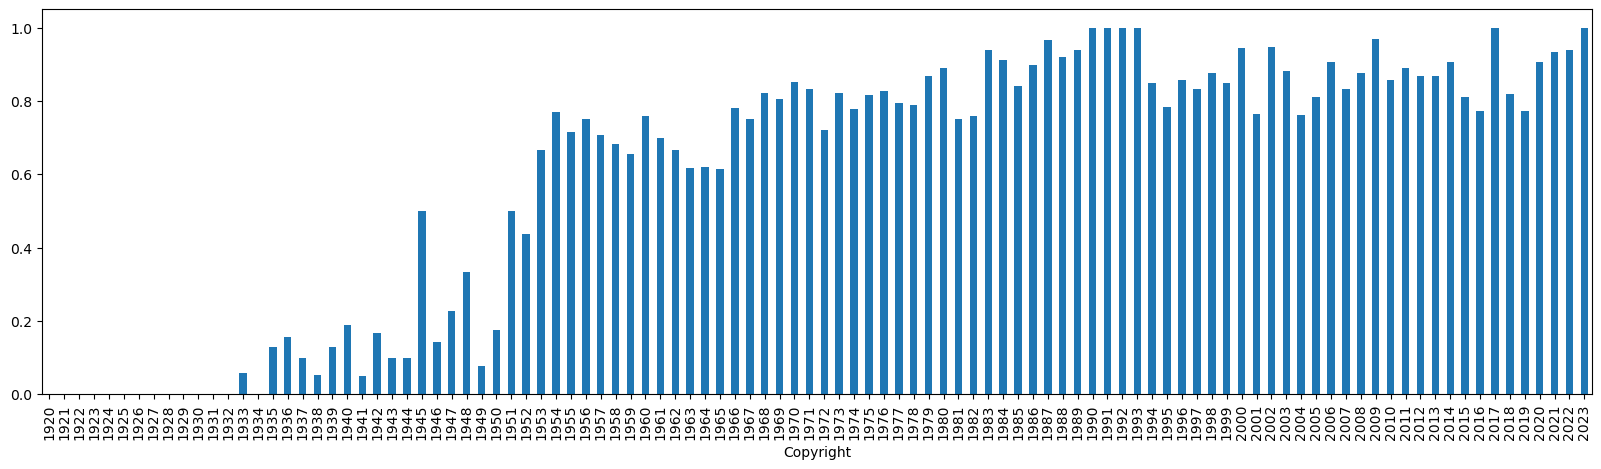

In [768]:
celoplosnahistorie.plot.bar(figsize=(20,5))

In [769]:
celoplosnahistorie[celoplosnahistorie < 0.5].tail(3)

Copyright
1949    0.076923
1950    0.176471
1952    0.437500
Name: celoplošná prolvenost, dtype: float64

In [770]:
celoplosnahistorie[celoplosnahistorie >= 0.5].head(3)

Copyright
1945    0.500000
1951    0.500000
1953    0.666667
Name: celoplošná prolvenost, dtype: float64

In [771]:
lide[(~lide['Film'].isin(zadnilvi) & lide['Lidé'].isin(lvovstvo))].head(10)

,Copyright,Film,Lidé
467,1930,Moderní výroba obuvi (401979),Otakar Vávra (9507)
482,1930,Světlo proniká tmou (401977),Otakar Vávra (9507)
484,1930,Zájezd Baťovců do Jugoslavie (401978),Otakar Vávra (9507)
584,1933,Žijeme v Praze (401976),Otakar Vávra (9507)
625,1933,Ze světa lesních samot (395592),Otakar Vávra (9507)
636,1933,Svítání (395596),Otakar Vávra (9507)
695,1935,Vdavky Nanynky Kulichovy (395689),Otakar Vávra (9507)
698,1935,Bezdětná (395699),Otakar Vávra (9507)
701,1935,Jedenácté přikázání (395694),Otakar Vávra (9507)
709,1935,Listopad (395682),Otakar Vávra (9507)


In [772]:
lide[(~lide['Film'].isin(zadnilvi) & lide['Lidé'].isin(lvovstvo))].groupby('Lidé')['Copyright'].min().nsmallest(20)

Lidé
Otakar Vávra (9507)           1930
Jiřina Bohdalová (2878)       1937
Vlastimil Brodský (833)       1937
Karel Černý (1241)            1939
Jiří Krejčík (7882)           1946
František Vláčil (5191)       1947
Ladislav Chudík (14421)       1948
Karel Kachyňa (3526)          1949
Vojtěch Jasný (4666)          1949
Jiří Kodet (7135)             1950
Stanislav Milota (11046)      1950
Věra Chytilová (1555)         1951
Miloš Forman (7872)           1952
Hynek Bočan (2947)            1953
Jana Brejchová (7710)         1953
Ladislav Mrkvička (6298)      1953
Stella Zázvorková (834)       1954
Věra Plívová-Šimková (186)    1954
Vladimír Labský (5265)        1955
Miroslav Ondříček (3524)      1956
Name: Copyright, dtype: int64

### Historická prolvenost II

In [773]:
lide

,Copyright,Film,Lidé
0,1898,Staroměstští hasiči (401702),Jan Kříženecký (127419)
1,1898,Smích a pláč (395110),Josef Šváb-Malostranský (55291)
1,1898,Smích a pláč (395110),Jan Kříženecký (127419)
2,1898,Cyklisté (401705),Jan Kříženecký (127419)
3,1898,Defilování vojska o Božím těle na Královských ...,Jan Kříženecký (127419)
...,...,...,...
4572,2023,Ostrov (402284),Karel Zámečník (75946)
4572,2023,Ostrov (402284),Roman Čapek (zvuk
4572,2023,Ostrov (402284),záznam a mix zvuku)
4572,2023,Ostrov (402284),Karel Zámečník


In [774]:
historicky = lide.merge(lvi[['Jméno','Ročník','Lev']], left_on='Lidé', right_on='Jméno')

In [775]:
historicky = historicky[(historicky['Lev'] == 'vyhra') & (historicky['Ročník'] < historicky['Copyright'])].drop_duplicates()

In [776]:
melilva = historicky['Film'].drop_duplicates().to_list()

In [777]:
novodobaprolvenost = pd.Series(filmy[filmy['Film'].isin(melilva)].groupby('Copyright')['Film'].nunique() / filmy.groupby('Copyright')['Film'].nunique(), name="novodobá prolvenost")

<Axes: xlabel='Copyright'>

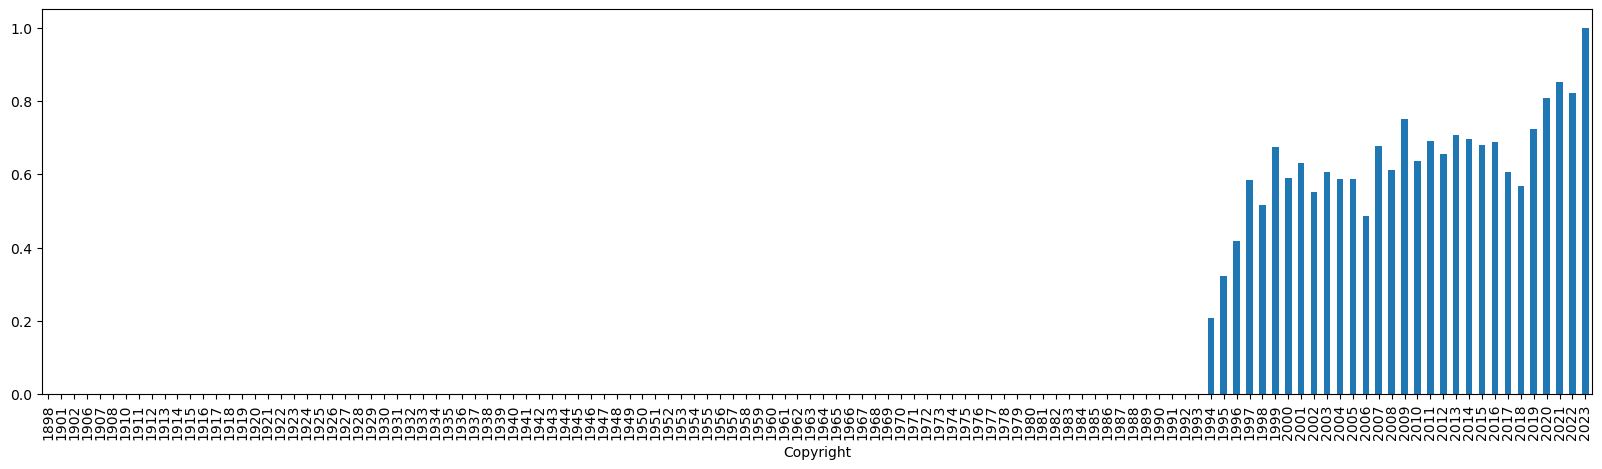

In [778]:
novodobaprolvenost.plot.bar(figsize=(20,5))

In [779]:
novodobaprolvenost[novodobaprolvenost < 0.5]

Copyright
1994    0.206897
1995    0.321429
1996    0.416667
2006    0.487179
Name: novodobá prolvenost, dtype: float64

In [780]:
historicky[historicky['Film'] == 'Mazaný Filip (20319)']['Lidé'].drop_duplicates()

10999    Vladimír Smutný (1772)
18036    Milan Šteindler (1572)
21025       Eva Holubová (5948)
25415        Ivan Trojan (6789)
27311    Anna Geislerová (5433)
36085      Jiří Macháček (3133)
36968    Radim Hladík ml. (580)
40768       Luděk Hudec (12627)
Name: Lidé, dtype: object

## Lvové herectvo x nelvové herectvo

In [781]:
hraji[(hraji['Film'].isin(nejlepsifilmy))].groupby('Hrají').size().nlargest()

Hrají
Marek Daniel (936)          6
Jan Budař (11090)           5
Martin Huba (7134)          5
Ivan Trojan (6789)          4
Jaroslava Pokorná (2727)    4
dtype: int64

In [782]:
nejcastejsiherectvo = pd.Series(hraji[hraji['Copyright'] >= 1993].groupby("Hrají").size(), name='Nejčastější herectvo')
nejcastejsiherectvo = nejcastejsiherectvo[nejcastejsiherectvo > 10].index.to_list()
nejcastejsiherectvo

['Alena Mihulová (7032)',
 'Alice Bendová (8726)',
 'Alois Švehlík (6277)',
 'Andrea Hoffmannová',
 'Andrej Hryc (6636)',
 'Andrej Polák (10913)',
 'Anita Krausová (47228)',
 'Anna Geislerová (5433)',
 'Anna Polívková (15610)',
 'Anna Šišková (6600)',
 'Arnošt Goldflam (1579)',
 'Barbora Fišerová (4989)',
 'Barbora Poláková (24914)',
 'Bohumil Klepl (1434)',
 'Boleslav Polívka (1556)',
 'Boris Hybner (7596)',
 'Bořivoj Navrátil (11086)',
 'Csongor Kassai (6576)',
 'Cyril Drozda (938)',
 'Dana Morávková (2293)',
 'David Matásek (3884)',
 'David Novotný (1834)',
 'David Vávra (6006)',
 'David Švehlík (16949)',
 'Eliška Křenková (26750)',
 'Emília Vášáryová (4986)',
 'Ester Geislerová (7019)',
 'Eva Holubová (5948)',
 'Eva Leinweberová Nosálková (2056)',
 'Filip Blažek (3869)',
 'Filip Brouk (20047)',
 'Filip Kaňkovský (32682)',
 'Filip Rajmont (5141)',
 'Gabriela Míčová (9758)',
 'Halka Třešňáková (24197)',
 'Hana Seidlová (6092)',
 'Hana Vagnerová (16186)',
 'Hanuš Bor (7070)',
 'Hynek 

In [783]:
hrajivelvech = hraji[(hraji['Copyright'] >= 1993) & (hraji['Film'].isin(nejlepsifilmy)) & (hraji['Hrají'].isin(nejcastejsiherectvo))].groupby('Hrají').size()
hrajivelvech.nlargest()

Hrají
Marek Daniel (936)          6
Jan Budař (11090)           5
Martin Huba (7134)          5
Ivan Trojan (6789)          4
Jaroslava Pokorná (2727)    4
dtype: int64

In [784]:
hrajivnominacich = hraji[(hraji['Copyright'] >= 1993) & (hraji['Film'].isin(nominovanefilmy)) & (hraji['Hrají'].isin(nejcastejsiherectvo))].groupby('Hrají').size()

In [785]:
hrajivnelvech = hraji[(hraji['Copyright'] >= 1993)  & (hraji['Hrají'].isin(nejcastejsiherectvo))].groupby('Hrají').size()
hrajivnelvech.nlargest()

Hrají
Boleslav Polívka (1556)     51
Ondřej Vetchý (836)         50
Miroslav Táborský (1841)    47
Jiří Lábus (838)            46
Jaromír Dulava (1837)       44
dtype: int64

In [786]:
(hrajivelvech / hrajivnelvech).nlargest(10)

Hrají
Jaroslava Pokorná (2727)    0.333333
Marek Daniel (936)          0.333333
Jiří Ornest (6011)          0.272727
Thomas Zielinski (17060)    0.250000
Martin Huba (7134)          0.238095
Martin Myšička (13007)      0.235294
Tomáš Bambušek (11031)      0.230769
Ivan Trojan (6789)          0.210526
Cyril Drozda (938)          0.181818
Jan Tříska (4834)           0.181818
dtype: float64

**NUTNO ZKONTROLOVAT NOVINKY**

In [787]:
hraji[(hraji['Copyright'] >= 1993) & hraji['Hrají'].isin(nejcastejsiherectvo) & (~hraji['Hrají'].isin(hrajivelvech.index.to_list()))].groupby('Hrají').size().nlargest(10)

Hrají
Marek Vašut (3566)         38
Milan Šteindler (1572)     32
Jaroslav Plesl (22672)     31
Bohumil Klepl (1434)       28
Jan Přeučil (4990)         27
Jan Vondráček (1713)       27
Jaromír Nosek (585)        27
Jiří Mádl (18965)          27
Karel Dobrý (6362)         26
Oldřich Navrátil (7955)    26
dtype: int64

In [788]:
hraji[(hraji['Copyright'] >= 1993) & hraji['Hrají'].isin(nejcastejsiherectvo) & (~hraji['Hrají'].isin(hrajivnominacich.index.to_list()))].groupby('Hrají').size().nlargest(40)

Hrají
Marek Vašut (3566)               38
Milan Šteindler (1572)           32
Josef Somr (1054)                23
Jaroslava Obermaierová (2716)    22
Václav Vydra nejml. (2666)       21
Václav Postránecký (7956)        20
Petr Nárožný (1052)              20
Filip Blažek (3869)              19
Jan Dolanský (1091)              18
Jakub Kohák (2024)               18
Jan Skopeček (8252)              17
Lucie Vondráčková (1057)         17
Jana Synková (12616)             16
Jiří Krampol (4985)              16
Martin Hub (7650)                16
Dana Morávková (2293)            16
Pavel Zedníček (9118)            15
Tomáš Magnusek (28382)           15
Roman Skamene (6363)             15
Lukáš Vaculík (3864)             14
Ondřej Pavelka (6299)            14
Radoslav Brzobohatý (2770)       13
Václav Jiráček (12107)           13
Martin Faltýn (6096)             13
Šárka Vaculíková (16033)         13
Martin Písařík (18968)           13
David Vávra (6006)               13
Michal Dlouhý (1071)  

## Demografie

In [789]:
lvi.groupby('KategorieS').size().sort_values(ascending=False)

KategorieS
Nejlepší film                                              223
Nejlepší zvuk                                              182
Nejlepší dokument                                          171
Nejlepší scénář                                            165
Nejlepší hudba                                             156
Nejlepší střih                                             127
Nejlepší kamera                                            126
Nejlepší režie                                             124
Nejlepší herečka ve vedlejší roli                          121
Hlavní ženský herecký výkon                                121
Nejlepší herec v hlavní roli                               121
Nejlepší herec ve vedlejší roli                            119
Nejlepší výtvarný počin                                    118
Nejlepší masky                                              71
Nejlepší scénografie                                        69
Nejlepší kostýmy                            

In [790]:
(lvi[~lvi['Datum narození'].isnull()].groupby('KategorieS').size() / lvi.groupby('KategorieS').size()).sort_values()

KategorieS
Nejlepší masky                                             0.436620
Nejlepší krátký film                                       0.451613
Nejlepší televizní film nebo minisérie                     0.485714
Nejlepší televizní seriál                                  0.486486
Mimořádný počin v oblasti audiovize                        0.500000
Nejlepší scénografie                                       0.507246
Nejlepší hudba                                             0.544872
Nejlepší animovaný film                                    0.594595
Nejlepší kostýmy                                           0.645161
Nejlepší střih                                             0.677165
Nejlepší výtvarný počin                                    0.728814
Nejlepší zvuk                                              0.785714
Nejlepší film                                              0.793722
Nejlepší dokument                                          0.795322
Nejlepší kamera                      

In [815]:
lvi[(lvi['KategorieS'] == 'Nejlepší herec v hlavní roli') & (lvi['Datum narození'].isnull())]

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
34,1998,1999-02-28,Hlavní mužský herecký výkon,Boguslaw Linda,nominace,Boguslaw Linda,NaT,None,Je třeba zabít Sekala (163291),Nejlepší herec v hlavní roli,NaT
218,2023,2024-03-09,Nejlepší herec v hlavní roli,Jan Nedbal,nominace,Jan Nedbal,NaT,None,Bratři,Nejlepší herec v hlavní roli,NaT
468,2004,2005-03-05,Hlavní mužský herecký výkon,Iakov Kultiasov,vyhra,Iakov Kultiasov,NaT,None,Král zlodějů (20333),Nejlepší herec v hlavní roli,NaT
889,2013,2014-02-22,Hlavní mužský herecký výkon,Petr Stach (3347),nominace,Petr Stach,NaT,None,Hořící keř (398412),Nejlepší herec v hlavní roli,NaT
1278,2018,2019-03-23,Nejlepší mužský herecký výkon v hlavní roli,Tomáš Mrvík (7048),nominace,Tomáš Mrvík,NaT,None,Všechno bude (401774),Nejlepší herec v hlavní roli,NaT
1423,1994,1995-03-03,Hlavní mužský herecký výkon,Gennadij Nazarov (83928),nominace,Gennadij Nazarov,NaT,None,Život a neobyčejná dobrodružství vojína Ivana ...,Nejlepší herec v hlavní roli,NaT
1536,2003,2004-03-03,Hlavní mužský herecký výkon,György Cserhalmi (15526),nominace,György Cserhalmi,NaT,None,Želary (13452),Nejlepší herec v hlavní roli,NaT
1577,1994,1995-03-03,Hlavní mužský herecký výkon,György Cserhalmi (15526),nominace,György Cserhalmi,NaT,None,Pevnost (185691),Nejlepší herec v hlavní roli,NaT
1851,2010,2011-03-05,Hlavní mužský herecký výkon,Konstantin Lavroněnko (75800),nominace,Konstantin Lavroněnko,NaT,None,Kajínek (55120),Nejlepší herec v hlavní roli,NaT
2507,2022,2023-03-04,Nejlepší herec v hlavní roli,Matyáš Řezníček (86133),nominace,Matyáš Řezníček,NaT,None,Hranice lásky (402262),Nejlepší herec v hlavní roli,NaT


In [791]:
lvi.groupby('KategorieS')['Věk'].mean().sort_values()

KategorieS
Nejlepší krátký film                                      14345 days 15:25:42.857142784
Hlavní ženský herecký výkon                               15192 days 05:10:35.294117632
Nejlepší zvuk                                             15403 days 19:07:58.321678336
Cena filmových kritiků a teoretiků za nejlepší dokument   16126 days 11:17:38.823529472
Nejlepší režie                                            16318 days 07:36:35.121951232
Nejlepší film                                             16363 days 02:42:42.711864320
Nejlepší animovaný film                                   16370 days 05:27:16.363636480
Nejlepší herečka ve vedlejší roli                         16516 days 04:56:04.485981184
Nejlepší hudba                                            16862 days 18:55:03.529411840
Nejlepší dokument                                         16960 days 19:14:07.058823424
Nejlepší scénář                                           17032 days 15:53:22.758620672
Nejlepší televizní fi

In [792]:
lvi[lvi['Lev'] == 'vyhra'].groupby('KategorieS')['Věk'].mean().sort_values()

KategorieS
Nejlepší krátký film                                                10667 days 08:00:00
Cena filmových kritiků a teoretiků za nejlepší dokument             13667 days 00:00:00
Nejlepší zvuk                                             14967 days 03:14:35.675675648
Hlavní ženský herecký výkon                               15577 days 03:18:37.241379328
Nejlepší režie                                                      15646 days 19:12:00
Nejlepší herečka ve vedlejší roli                                   15765 days 00:00:00
Nejlepší film                                             15939 days 04:40:58.536585472
Nejlepší televizní film nebo minisérie                              15981 days 19:12:00
Nejlepší scénář                                           16172 days 06:56:50.526315776
Nejlepší hudba                                            16414 days 01:15:47.368421120
Nejlepší dokument                                         17175 days 13:33:54.782608640
Nejlepší kostýmy     

In [793]:
27987 / 365.25

76.62422997946612

In [794]:
10667 / 365.25

29.204654346338124

In [795]:
(lvi[lvi['Lev'] == 'vyhra'].groupby('KategorieS')['Věk'].median() - lvi.groupby('KategorieS')['Věk'].median()).sort_values()

KategorieS
Nejlepší režie                                            -1410 days +12:00:00
Nejlepší kostýmy                                           -742 days +12:00:00
Nejlepší scénář                                            -533 days +00:00:00
Cena filmových kritiků a teoretiků za nejlepší dokument    -475 days +00:00:00
Nejlepší zvuk                                              -282 days +12:00:00
Dlouhodobý přínos českému filmu                                0 days 00:00:00
Cena ČFTA za audiovizuální počin roku                          0 days 00:00:00
Mimořádný počin v oblasti audiovize                            0 days 00:00:00
Nejlepší film                                                 12 days 00:00:00
Nejlepší dokument                                            365 days 00:00:00
Nejlepší herečka ve vedlejší roli                            369 days 00:00:00
Nejlepší herec v hlavní roli                                 424 days 12:00:00
Hlavní ženský herecký výkon              

In [796]:
veky = pd.DataFrame(lvi[lvi['Lev'] == 'vyhra'].groupby(['Ročník','KategorieS'])['Věk'].mean() - lvi[lvi['Lev'] == 'nominace'].groupby(['Ročník','KategorieS'])['Věk'].mean()).reset_index()
veky = veky[veky["Ročník"] > 1993].dropna()
veky = veky[veky['KategorieS'] != 'Dlouhodobý přínos českému filmu']
veky = veky[veky['KategorieS'] != 'Cena ČFTA za audiovizuální počin roku']
veky = veky[veky['KategorieS'] != 'Mimořádný počin v oblasti audiovize']
veky

,Ročník,KategorieS,Věk
11,1994,Hlavní ženský herecký výkon,-2033 days +12:00:00
12,1994,Nejlepší film,-31 days +14:24:00
13,1994,Nejlepší herec v hlavní roli,2058 days 12:00:00
14,1994,Nejlepší herec ve vedlejší roli,-5015 days +12:00:00
15,1994,Nejlepší herečka ve vedlejší roli,5207 days 00:00:00
...,...,...,...
437,2022,Nejlepší režie,6286 days 16:00:00
439,2022,Nejlepší scénář,1226 days 16:00:00
441,2022,Nejlepší televizní film nebo minisérie,-4104 days +09:36:00
442,2022,Nejlepší televizní seriál,4426 days 12:00:00


In [797]:
veky.groupby('KategorieS')['Věk'].median().sort_values()

KategorieS
Nejlepší krátký film                                      -7538 days +17:00:00
Cena filmových kritiků a teoretiků za nejlepší dokument   -3191 days +12:00:00
Nejlepší televizní film nebo minisérie                    -3062 days +20:48:00
Nejlepší scénář                                           -1590 days +14:24:00
Nejlepší hudba                                            -1085 days +00:00:00
Nejlepší režie                                            -1036 days +12:00:00
Nejlepší herečka ve vedlejší roli                          -415 days +08:00:00
Nejlepší film                                              -398 days +12:00:00
Nejlepší zvuk                                              -291 days +09:36:00
Nejlepší střih                                                 0 days 00:00:00
Hlavní ženský herecký výkon                                   65 days 12:00:00
Nejlepší masky                                               137 days 12:00:00
Nejlepší scénografie                     

In [798]:
with open(os.path.join("data_fixes", "zeny.json"), encoding="utf-8") as zeny:
    zeny = json.loads(zeny.read())

In [799]:
extrazeny = ['Agnieszka Holland','Halina Pawlowská','Vladivojovna La Chia','Vladivojna La Chia','Irena a Vojtěch Havlovi','Sussan Deyhim','La Petite Sonja','Irena Hradecká','Barbora Kačena','Milena Jelinek','Zdenka Simandlova','Andrea Schumacher','Ľubica Orechovská','Klára Bukovská','Kateřina Černá','Alice Nemanská','Mira Fornay','Jasmina Torbati','Susann Schimk','Katarína Horská','Andrea McDonald','Anett Weber','Barbara Kichi','Alina Janerka','Daria Kashcheeva','Anna Lyubynetska','Anna Wowra','Michaela Mihályi','Heike Richter-Karst','Patricia Ortiz Martinez','Dana Budisavljević','Miljenka Čogelja','Andrea Shaffer','Krystyna Krauze','Barbara Ławska','Jana Janěková ml.','Natália Pavlove']

In [800]:
for z in [x for x in lvi[lvi['KategorieS'] == 'Hlavní ženský herecký výkon']['Jméno bez id'].drop_duplicates().to_list() if x not in zeny]:
    zeny.append(z)
for z in [x for x in lvi[lvi['KategorieS'] == 'Nejlepší herečka ve vedlejší roli']['Jméno bez id'].drop_duplicates().to_list() if x not in zeny]:
    zeny.append(z)


In [801]:
for e in extrazeny:
    zeny.append(e)
zeny = list(set(zeny))

In [802]:
lvice = lvi[(lvi["Jméno bez id"].str[-1:] == 'á') | (lvi["Jméno bez id"].isin(zeny))]

In [803]:
(lvice[lvice['Lev'] == 'vyhra'].groupby('KategorieS').size() / lvi[lvi['Lev'] == 'vyhra'].groupby('KategorieS').size()).sort_values()

KategorieS
Nejlepší scénář                                            0.048780
Nejlepší střih                                             0.060606
Nejlepší film                                              0.061224
Nejlepší scénografie                                       0.066667
Nejlepší režie                                             0.066667
Nejlepší hudba                                             0.069767
Nejlepší televizní seriál                                  0.111111
Nejlepší výtvarný počin                                    0.171429
Dlouhodobý přínos českému filmu                            0.218750
Nejlepší televizní film nebo minisérie                     0.272727
Nejlepší animovaný film                                    0.333333
Nejlepší masky                                             0.363636
Nejlepší dokument                                          0.407407
Nejlepší krátký film                                       0.500000
Mimořádný počin v oblasti audiovize  

In [804]:
def kontrola_genderu(kategorie):
    lvovice = lvice['Jméno bez id'].drop_duplicates().to_list()
    return lvi[(lvi['KategorieS'] == kategorie) & (~lvi['Jméno bez id'].isin(lvovice))]['Jméno'].drop_duplicates().to_list()

In [805]:
kontrola_genderu('Nejlepší kamera')

['Martin Štrba (829)',
 'F. A. Brabec (5610)',
 'Štěpán Kučera (492)',
 'Diviš Marek (933)',
 'Jan Střítežský (2309)',
 'Jan Šťastný (2439)',
 'Friede Clausz',
 'Juraj Šajmovič st. (54289)',
 'Vladimír Smutný (1772)',
 'Martin Čech (6316)',
 'Jaroslav Brabec (1744)',
 'Jiří Macák (1725)',
 'Ramúnas Greičius',
 'Karel Fairaisl (3609)',
 'Alexander Šurkala (16390)',
 'Antonio Riestra (37227)',
 'David Ployhar (5816)',
 'Mark Bliss (31678)',
 'Richard Řeřicha (2088)',
 'Miro Gábor (4807)',
 'Ján Ďuriš (6752)',
 'Jan Malíř (5933)',
 'Igor Luther (1908)',
 'Adam Sikora (23288)',
 'Miloslav Holman (6355)',
 'Federico Cesca',
 'Martin Douba (4249)',
 'Tomáš Sysel (1331)',
 'Jaromír Kačer (4673)',
 'Ferdinand Mazurek (48046)',
 'Petr Koblovský (656)',
 'Marek Jícha (4509)',
 'Lukáš Milota (23907)',
 'Filip Marek (83788)',
 'Marek Dvořák (41227)',
 'Jaromír Šofr (4285)',
 'Asen Šopov (6330)',
 'Tomáš Juríček (6499)',
 'Martin Duba (529)',
 'Emil Sirotek',
 'Patrik Hoznauer (1037)',
 'Petr Hojda

In [806]:
lvi[(lvi['KategorieS'] == 'Nejlepší scénář') & (lvi['Lev'] == 'vyhra')]['Jméno'].drop_duplicates()

38           Jiří Křižan (13207)
135           Saša Gedeon (4830)
157           Bohdan Sláma (926)
253             Jiří Hubač (848)
385          Julius Ševčík (149)
388     Alex Koenigsmark (76145)
389         Petr Kolečko (26737)
424         Zdeněk Svěrák (1892)
569          Petr Zelenka (4806)
687           Václav Havel (676)
737        David Ondříček (2028)
746         Marek Epstein (1919)
752        Misha Votruba (47926)
849          Marek Najbrt (6349)
852        Robert Geisler (6354)
853        Benjamin Tuček (1557)
890         Štěpán Hulík (57210)
931       Petr Jarchovský (2075)
1009        Jiří Havelka (28977)
1030       Ondřej Štindl (11562)
1061        Vojtěch Mašek (1707)
1068      Marek Šindelka (76100)
1122         Ivan Arsenjev (808)
1219           Petr Václav (486)
1272         Petr Pýcha (401774)
1411         Václav Šašek (1766)
1431     Vladimír Morávek (6734)
1435           Jan Budař (11090)
1478     Halina Pawlowská (9006)
1734         Martin Šulík (5432)
1739      

In [807]:
lvice[(lvice['KategorieS'] == 'Nejlepší scénář') & (lvice['Lev'] == 'vyhra')]['Jméno'].drop_duplicates()

1478    Halina Pawlowská (9006)
1861         Alice Nellis (535)
Name: Jméno, dtype: object

In [808]:
(lvice.groupby('KategorieS').size() / lvi.groupby('KategorieS').size()).sort_values()

KategorieS
Nejlepší kamera                                            0.007937
Nejlepší zvuk                                              0.016484
Nejlepší hudba                                             0.057692
Nejlepší televizní seriál                                  0.081081
Nejlepší scénografie                                       0.086957
Nejlepší režie                                             0.088710
Nejlepší scénář                                            0.109091
Nejlepší střih                                             0.118110
Nejlepší film                                              0.143498
Nejlepší výtvarný počin                                    0.194915
Dlouhodobý přínos českému filmu                            0.218750
Cena filmových kritiků a teoretiků za nejlepší dokument    0.294118
Nejlepší televizní film nebo minisérie                     0.314286
Nejlepší krátký film                                       0.354839
Nejlepší dokument                    

<Axes: xlabel='Ročník'>

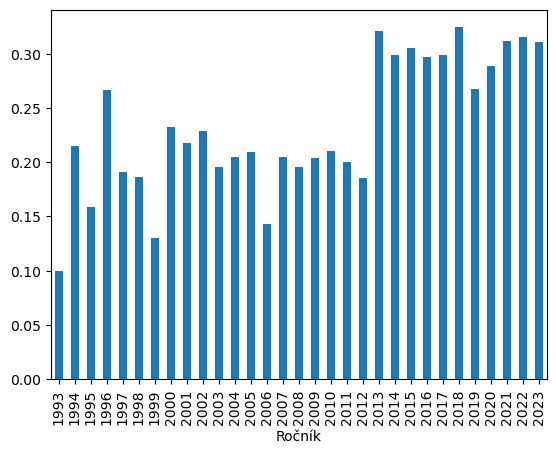

In [809]:
(lvice.groupby('Ročník').size() / lvi.groupby('Ročník').size()).plot.bar()

<Axes: xlabel='Ročník'>

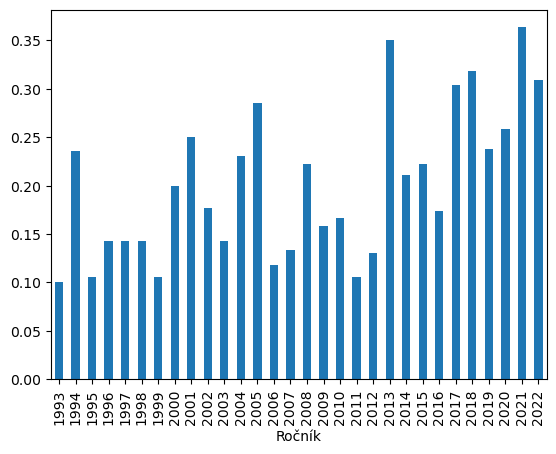

In [810]:
(lvice[lvice['Lev'] == 'vyhra'].groupby('Ročník').size() / lvi[lvi['Lev'] == 'vyhra'].groupby('Ročník').size()).plot.bar()

## Lvi vs. čsfd

In [811]:
csfd = pd.read_json(os.path.join("data","lvy_csfd.json"))

In [812]:
csfd.loc[csfd['Film'] == 'Záhrada', 'Film'] = 'Zahrada (8967)'

In [813]:
csfd.sort_values(by="Hodnocení", ascending=False)

,Film,Hodnocení,Počet hodnocení
3,Kolja (9013),86,62628
20,Hořící keř (398412),86,18718
7,Musíme si pomáhat (15231),85,35356
5,Je třeba zabít Sekala (163291),83,13392
15,Karamazovi (56434),82,13181
9,Rok ďábla (12836),80,14534
2,Zahrada (8967),80,4279
4,Knoflíkáři (9793),80,16878
19,Ve stínu (66076),79,21561
28,Zátopek,78,11964


In [814]:
csfd.sort_values(by="Počet hodnocení", ascending=True)

,Film,Hodnocení,Počet hodnocení
29,Il Boemo,63,3313
21,Cesta ven (400548),60,3671
25,Všechno bude (401774),59,3822
2,Zahrada (8967),80,4279
18,Poupata (116470),65,4971
8,Otesánek (401949),64,6061
26,Nabarvené ptáče (401962),68,8191
17,Pouta (80516),73,8719
1,Díky za každé nové ráno (7866),74,9328
14,Tajnosti (52699),69,9359
